### Importing Necessary Libraries

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

### Loading Dataset

In [2]:
df=pd.read_csv('../data/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Selecting Feature as Text

In [4]:
data=df.Text.to_frame()

In [5]:
data.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


### Checking Null Values

In [6]:
import numpy as np
# checking null values
np.sum(data['Text'].isnull())

0

## Data Preprocessing

In [7]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to C:\Users\korla
[nltk_data]     anusha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\korla
[nltk_data]     anusha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\korla
[nltk_data]     anusha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Load stop words
stop_words = set(stopwords.words('english'))

In [9]:
# Preprocess text data
data['Text'] = data['Text'].apply(lambda x: x.lower())  # Convert text to lowercase
data['Text'] = data['Text'].apply(lambda x: word_tokenize(x))  # Tokenize text
data['Text'] = data['Text'].apply(lambda x: [word for word in x if word not in stop_words])  # Remove stop words
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))  # Join filtered tokens back into a string

# Applying Polarity to extract positive,negative,nuetral values

In [10]:
# Apply polarity analysis to preprocessed reviews
sia = SentimentIntensityAnalyzer()
data['sentiment_scores'] = data['Text'].apply(lambda x: sia.polarity_scores(x))  # Apply polarity analysis

In [11]:
# Extract polarity scores
data['neg_score'] = data['sentiment_scores'].apply(lambda x: x['neg'])
data['neu_score'] = data['sentiment_scores'].apply(lambda x: x['neu'])
data['pos_score'] = data['sentiment_scores'].apply(lambda x: x['pos'])
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

In [12]:
# Convert polarity scores to target values
data['target'] = data[['neg_score', 'neu_score', 'pos_score']].idxmax(axis=1)
data['target'] = data['target'].apply(lambda x: 'positive' if x == 'pos_score' else ('negative' if x == 'neg_score' else 'neutral'))

In [13]:
data.head()

,Text,sentiment_scores,neg_score,neu_score,pos_score,compound_score,target
0,bought several vitality canned dog food produc...,"{'neg': 0.0, 'neu': 0.503, 'pos': 0.497, 'comp...",0.000,0.503,0.497,0.9413,neutral
1,product arrived labeled jumbo salted peanuts ....,"{'neg': 0.113, 'neu': 0.792, 'pos': 0.096, 'co...",0.113,0.792,0.096,-0.1027,neutral
2,"confection around centuries . light , pillowy ...","{'neg': 0.162, 'neu': 0.568, 'pos': 0.27, 'com...",0.162,0.568,0.270,0.8073,neutral
3,looking secret ingredient robitussin believe f...,"{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'comp...",0.000,0.854,0.146,0.4404,neutral
4,great taffy great price . wide assortment yumm...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",0.000,0.369,0.631,0.9468,positive


In [14]:
# Extract positive and negative reviews
data = data[(data['target'] == 'positive') | (data['target'] == 'negative')]

In [15]:
data

,Text,sentiment_scores,neg_score,neu_score,pos_score,compound_score,target
4,great taffy great price . wide assortment yumm...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",0.000,0.369,0.631,0.9468,positive
7,taffy good . soft chewy . flavors amazing . wo...,"{'neg': 0.0, 'neu': 0.279, 'pos': 0.721, 'comp...",0.000,0.279,0.721,0.9380,positive
13,good flavor ! came securely packed ... fresh d...,"{'neg': 0.0, 'neu': 0.234, 'pos': 0.766, 'comp...",0.000,0.234,0.766,0.9466,positive
14,strawberry twizzlers guilty pleasure - yummy ....,"{'neg': 0.176, 'neu': 0.377, 'pos': 0.447, 'co...",0.176,0.377,0.447,0.6486,positive
16,love eating good watching tv looking movies ! ...,"{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'comp...",0.000,0.461,0.539,0.9348,positive
...,...,...,...,...,...,...,...
568417,best brand mango chutney able buy enjoy .,"{'neg': 0.0, 'neu': 0.403, 'pos': 0.597, 'comp...",0.000,0.403,0.597,0.8126,positive
568428,pricey enjoy treat flavor wonderfull packaging...,"{'neg': 0.0, 'neu': 0.363, 'pos': 0.637, 'comp...",0.000,0.363,0.637,0.9674,positive
568442,product great . gives much energy tastes great...,"{'neg': 0.145, 'neu': 0.374, 'pos': 0.481, 'co...",0.145,0.374,0.481,0.8020,positive
568449,great sesame chicken .. good better resturants...,"{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",0.000,0.465,0.535,0.9300,positive


In [16]:
data['target'].value_counts()

positive    69187
negative      846
Name: target, dtype: int64

## Creating final DataFrame

In [17]:
a=data[data['target']=='positive'][:800]
b=data[data['target']=='negative'][:800]

In [18]:
final=pd.concat([a,b])

In [19]:
final['target'].value_counts()

positive    800
negative    800
Name: target, dtype: int64

In [20]:
final

,Text,sentiment_scores,neg_score,neu_score,pos_score,compound_score,target
4,great taffy great price . wide assortment yumm...,"{'neg': 0.0, 'neu': 0.369, 'pos': 0.631, 'comp...",0.000,0.369,0.631,0.9468,positive
7,taffy good . soft chewy . flavors amazing . wo...,"{'neg': 0.0, 'neu': 0.279, 'pos': 0.721, 'comp...",0.000,0.279,0.721,0.9380,positive
13,good flavor ! came securely packed ... fresh d...,"{'neg': 0.0, 'neu': 0.234, 'pos': 0.766, 'comp...",0.000,0.234,0.766,0.9466,positive
14,strawberry twizzlers guilty pleasure - yummy ....,"{'neg': 0.176, 'neu': 0.377, 'pos': 0.447, 'co...",0.176,0.377,0.447,0.6486,positive
16,love eating good watching tv looking movies ! ...,"{'neg': 0.0, 'neu': 0.461, 'pos': 0.539, 'comp...",0.000,0.461,0.539,0.9348,positive
...,...,...,...,...,...,...,...
524935,purchased package costco delicious . tasted aw...,"{'neg': 0.412, 'neu': 0.338, 'pos': 0.25, 'com...",0.412,0.338,0.250,-0.3400,negative
525437,dog ate product packaged thailand got immediat...,"{'neg': 0.503, 'neu': 0.497, 'pos': 0.0, 'comp...",0.503,0.497,0.000,-0.8442,negative
525983,"warning , warning , warning .... buy ! ! ! ! !...","{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'comp...",0.529,0.471,0.000,-0.9522,negative
526415,n't like stevia well brand . n't sweet coffee ...,"{'neg': 0.466, 'neu': 0.364, 'pos': 0.17, 'com...",0.466,0.364,0.170,-0.4717,negative


# Word Cloud for negetive and positive 

In [22]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud
# Extract positive and negative texts
positive_text = ' '.join(final[final['target'] == 'positive']['Text'])
negative_text = ' '.join(final[final['target'] == 'negative']['Text'])

# Check if texts are empty
if len(positive_text) == 0:
    print('Warning: No positive words found.')
if len(negative_text) == 0:
    print('Warning: No negative words found.')

# Generate word clouds
pos_freq = {word: positive_text.count(word) for word in positive_text.split()}
pos_cloud = WordCloud(background_color="white").generate_from_frequencies(pos_freq)

neg_freq = {word: negative_text.count(word) for word in negative_text.split()}
neg_cloud = WordCloud(background_color="white").generate_from_frequencies(neg_freq)

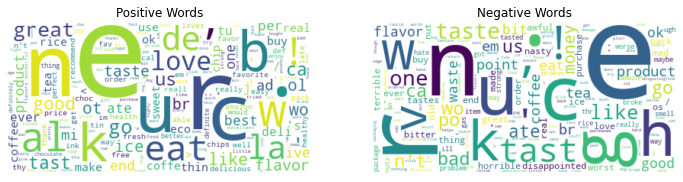

In [24]:
import matplotlib.pyplot as plt
# Display word clouds
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(pos_cloud, interpolation='bilinear')
axs[0].set_title('Positive Words')
axs[0].axis("off")

axs[1].imshow(neg_cloud, interpolation='bilinear')
axs[1].set_title('Negative Words')
axs[1].axis("off")

plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [26]:
X = final['Text']

## Encoding the labels

In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
final['target'] = labelencoder.fit_transform(final['target'])

In [28]:
final['target'].value_counts()

1    800
0    800
Name: target, dtype: int64

In [29]:
y = final['target']

## Splitting the data into train and test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 41)

# Word embedding techniques

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features= 2000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2))

In [32]:
import pickle
with open('../model/tfidf.pkl', 'wb') as f:
    pickle.dump(vectoriser, f)

In [33]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [34]:
X_train.shape

(1120, 2000)

In [35]:
y_train.shape

(1120,)

# Applying the Xgboost model

In [36]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
# Create an XGBoost model
model = xgb.XGBClassifier()
# Define hyperparameters to search over
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
}
# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_l

In [37]:
best_model = xgb.XGBClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
# Evaluate the model on the test data
y_pred = best_model.predict(X_test)

###  finding accuracy score

In [39]:
score = accuracy_score(y_test, y_pred)

In [40]:
print(score)

0.8833333333333333


# Confusion Matrix

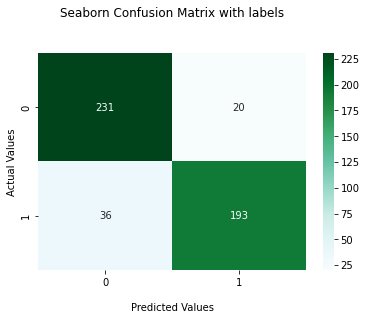

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='BuGn',fmt='0.0f')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

# Classification Report

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       251
           1       0.91      0.84      0.87       229

    accuracy                           0.88       480
   macro avg       0.89      0.88      0.88       480
weighted avg       0.88      0.88      0.88       480



# Adaboost Algorithm

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ada = AdaBoostClassifier( n_estimators=100)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [45]:
# Predict on testing set
y_pred = ada.predict(X_test)

# Finding Accuracy

In [46]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8729166666666667


# Confusion Matrix

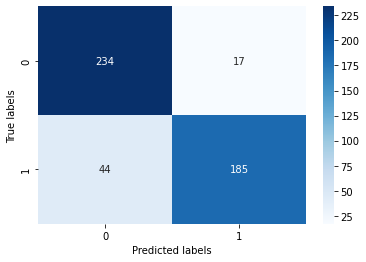

In [47]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Classification Report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       251
           1       0.92      0.81      0.86       229

    accuracy                           0.87       480
   macro avg       0.88      0.87      0.87       480
weighted avg       0.88      0.87      0.87       480



# Applying the Navi Bayes model

In [49]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=0.001)

In [50]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = accuracy_score(y_test, pred)

In [51]:
print(score)

0.9145833333333333


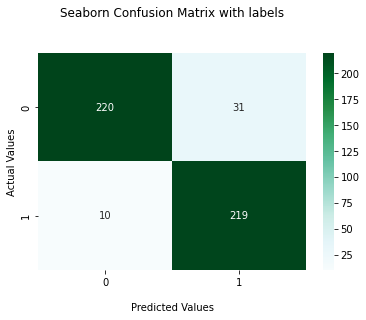

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='BuGn',fmt='0.0f')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');
plt.show()

In [53]:
# classification report for navie bayes
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91       251
           1       0.88      0.96      0.91       229

    accuracy                           0.91       480
   macro avg       0.92      0.92      0.91       480
weighted avg       0.92      0.91      0.91       480



In [54]:
pickle.dump(classifier, open(r'../model/nb_model.sav', 'wb'))

In [55]:
aDFGSDHFJGK

NameError: name 'aDFGSDHFJGK' is not defined

## Predictions

In [56]:
example = np.zeros(100)
example = [final['Text'][526571]]
example = vectoriser.transform(example)
p=classifier.predict(example)

In [57]:
p

array([0])

In [58]:
if p == 0:
    print("Frustrated")
else:
    print("Not Frustrated")

Frusted


## Model saving

In [59]:
import pickle
model_path = 'detection.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(best_model, file)

file.close()